<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
#conn = sqlite3.connect('survey-results-public.sqlite')
conn = sqlite3.connect('survey-data.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [4]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [5]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [2]:
# your code goes here
import seaborn as sns
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

In [6]:
df['Age'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


Stats of ConvertedCompYearly: count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64
μ + 3σ: 646426.2065215341
<class 'pandas.core.frame.DataFrame'>
Index: 23346 entries, 72 to 41187
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 20.5+ MB


Text(0.5, 1.0, 'Compensation Distribution (excluding outliers > μ+3σ)')

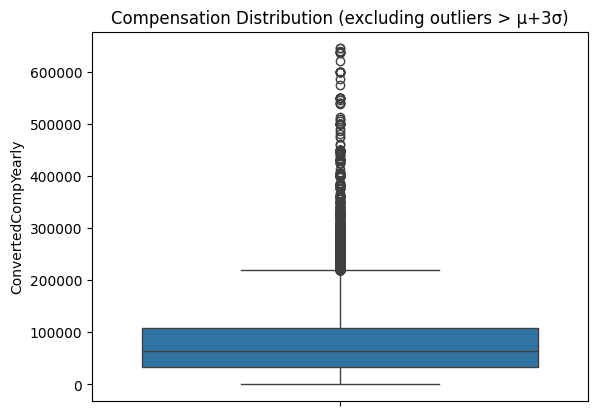

In [7]:
# removing extreme outliers
stats = df['ConvertedCompYearly'].describe()
print('Stats of ConvertedCompYearly:', stats)

# 3σ threshold
threshold = stats['mean']+stats['std']*3
print('μ + 3σ:', threshold)
df2 = df[df['ConvertedCompYearly'] < threshold]
df2.info()
sns.boxplot(df2['ConvertedCompYearly'])
plt.xticks(rotation=90)
plt.title('Compensation Distribution (excluding outliers > μ+3σ)')

IQR = Q3 - Q1 = 107971.5 - 32712.0 = 75259.5
Q1 - 1.5 IQR = -80177.25
Q3 + 1.5 IQR = 220860.75
<class 'pandas.core.frame.DataFrame'>
Index: 22457 entries, 72 to 41186
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 19.7+ MB


Text(0.5, 1.0, 'Compensation Distribution (excluding outliers > Q3+1.5IQR)')

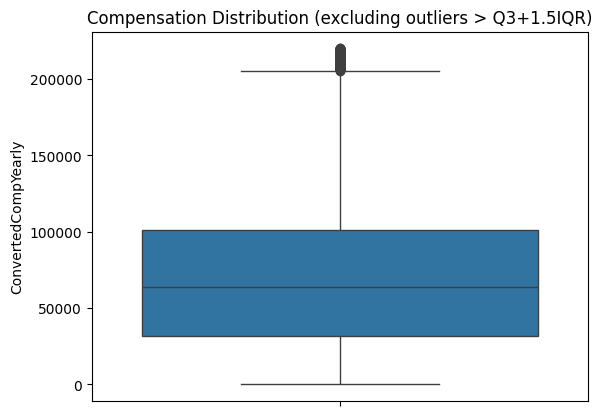

In [8]:
# Q3+1.5IQR threshold
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(f'IQR = Q3 - Q1 = {Q3} - {Q1} = {IQR}')
print('Q1 - 1.5 IQR =', lower_bound)
print('Q3 + 1.5 IQR =', upper_bound)
df3 = df[df['ConvertedCompYearly'] < upper_bound]
df3.info()
sns.boxplot(df3['ConvertedCompYearly'])
plt.xticks(rotation=90)
plt.title('Compensation Distribution (excluding outliers > Q3+1.5IQR)')

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


Text(0.5, 1.0, 'Age Distribution')

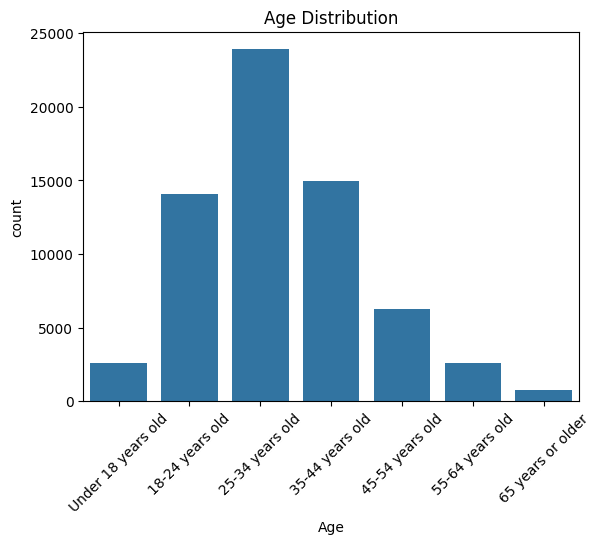

In [5]:
# your code goes here
a_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
sns.barplot(df['Age'].value_counts().reindex(a_order))
plt.xticks(rotation=45)
plt.title('Age Distribution')

<Axes: ylabel='Age_num'>

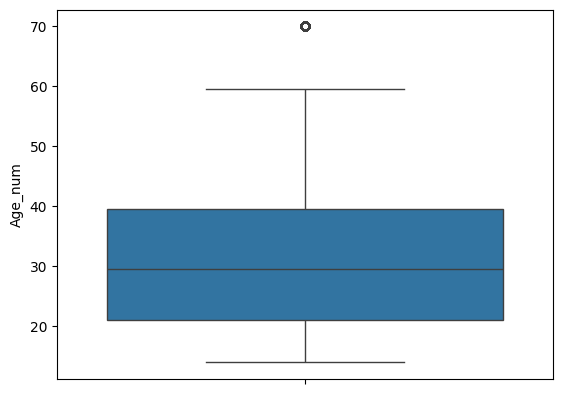

In [29]:
# replace range with approximate number
df['Age_num'] = df['Age'].replace({
    '25-34 years old': '29.5',
    '35-44 years old': '39.5',
    '18-24 years old': '21',
    '45-54 years old': '49.5',
    '55-64 years old': '59.5',
    'Under 18 years old': '14',
    '65 years or older': '70',
    'Prefer not to say': '0'}).astype(float)
# clean up by replacing 0.0 with mean
mean_age = df[df['Age_num'] != 0.0]['Age_num'].mean()
df.loc[:,'Age_num'] = df['Age_num'].replace(to_replace=0.0, value=mean_age)
# boxplot
sns.boxplot(df['Age_num'])

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


Text(0.5, 1.0, 'Compensation Distribution (excluding outliers > μ+3σ)')

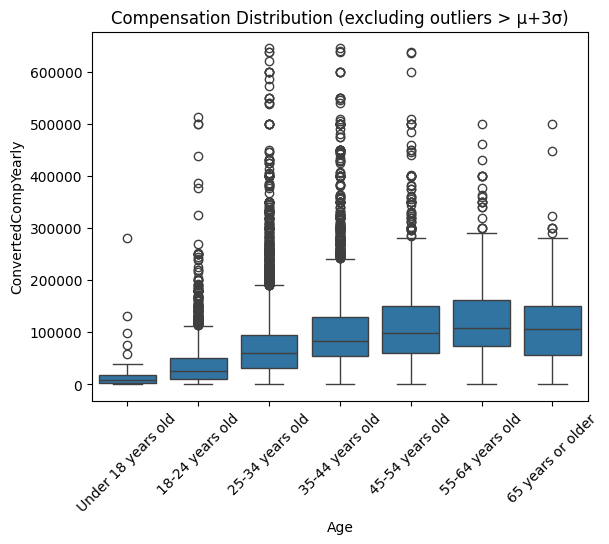

In [6]:
# your code goes here
# removing outliers above mean plus 3 sigmas
sns.boxplot(data=df2, x='Age', y='ConvertedCompYearly', order=a_order)
plt.xticks(rotation=45)
plt.title('Compensation Distribution (excluding outliers > μ+3σ)')

Text(0.5, 1.0, 'Compensation Distribution (excluding outliers > Q3+1.5IQR)')

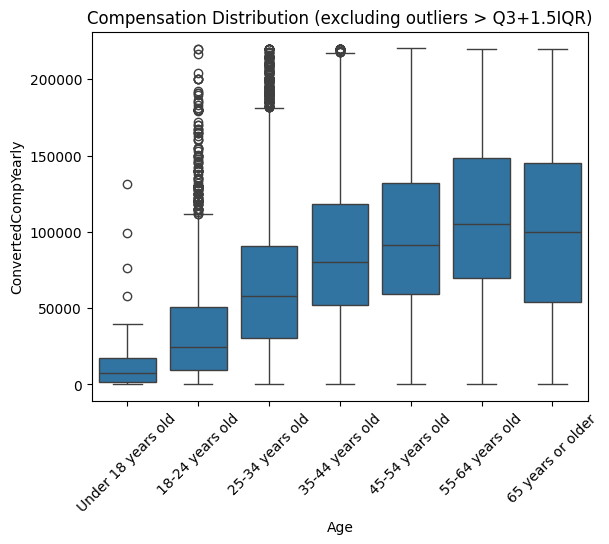

In [7]:
# removing outliers above Q3 + 1.5 IQR
sns.boxplot(data=df3, x='Age', y='ConvertedCompYearly', order=a_order)
plt.xticks(rotation=45)
plt.title('Compensation Distribution (excluding outliers > Q3+1.5IQR)')

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [8]:
# your code goes here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


Number of JobSat scores
 SatPoints
10-20     3581
0-10      2603
20-30     2428
30-40      868
40-50      785
90-100     598
70-80      504
80-90      384
60-70      319
50-60      317
Name: count, dtype: int64


C:\Users\clifford\AppData\Local\Temp\ipykernel_24780\1596991666.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SatPoints'] = pd.cut(df2['JobSatPoints_6'], bins, labels=ranges).copy()


Text(0.5, 0, 'Satisfaction')

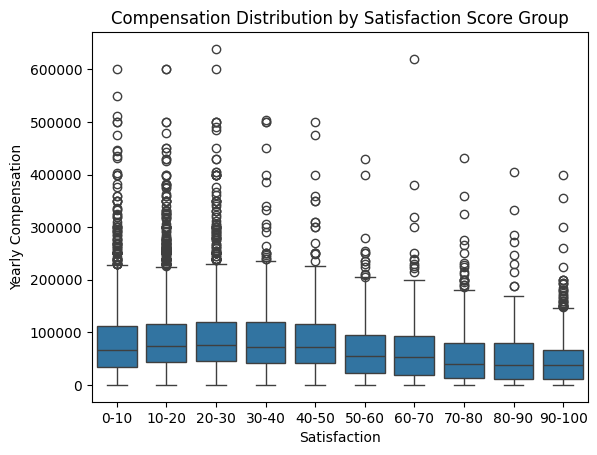

In [28]:
# Define custom bin edges and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Apply binning and add the results to a new column
df2['SatPoints'] = pd.cut(df2['JobSatPoints_6'], bins, labels=ranges)
print('Number of JobSat scores\n', df2['SatPoints'].value_counts())
sns.boxplot(data=df2, x='SatPoints', y='ConvertedCompYearly')
plt.title('Compensation Distribution by Satisfaction Score Group')
plt.ylabel('Yearly Compensation')
plt.xlabel('Satisfaction')

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


In [16]:
df['DevType'].value_counts()

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

Analyze compensation across the top 5 developer roles.


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Developer, full-stack'),
  Text(1, 0, 'Developer, back-end'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Developer, front-end'),
  Text(4, 0, 'Developer, desktop or enterprise applications')])

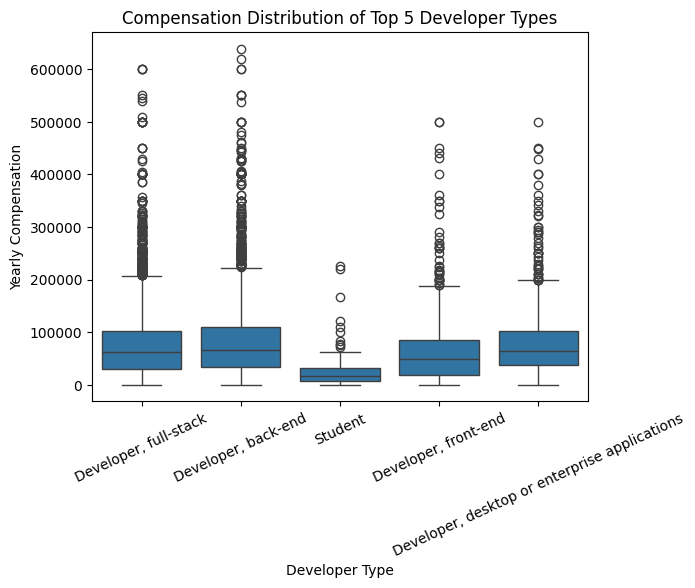

In [20]:
# your code goes here
top5 = df['DevType'].value_counts().head().index
sns.boxplot(data=df2[df2['DevType'].isin(top5)], x='DevType', y='ConvertedCompYearly', order=top5)
plt.title('Compensation Distribution of Top 5 Developer Types')
plt.ylabel('Yearly Compensation')
plt.xlabel('Developer Type')
plt.xticks(rotation=25)

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


In [21]:
df['Country'].value_counts()

Country
USA                 11095
Germany              4947
India                4231
UK                   3224
Ukraine              2672
                    ...  
Niger                   1
Guinea                  1
Dominica                1
Papua New Guinea        1
Solomon Islands         1
Name: count, Length: 183, dtype: int64

Analyze compensation across respondents from the top 5 countries.


([0, 1, 2, 3, 4],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'India'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'Ukraine')])

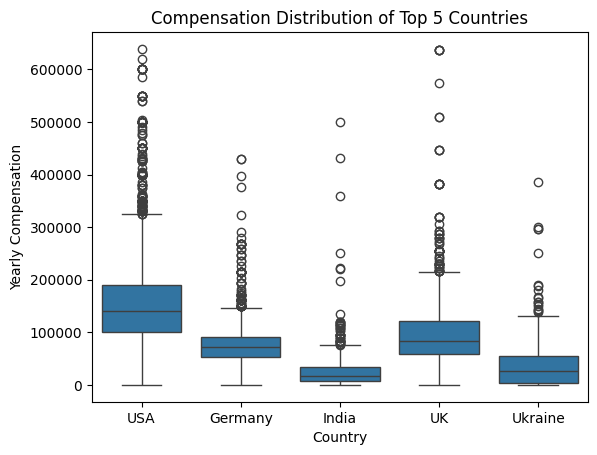

In [23]:
# your code goes here
top5 = df['Country'].value_counts().head().index
sns.boxplot(data=df2[df2['Country'].isin(top5)], x='Country', y='ConvertedCompYearly', order=top5)
plt.title('Compensation Distribution of Top 5 Countries')
plt.ylabel('Yearly Compensation')
plt.xlabel('Country')
plt.xticks(rotation=0)

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Employed, full-time'),
  Text(1, 0, 'Employed, part-time'),
  Text(2, 0, 'Independent contractor, freelancer, or self-employed'),
  Text(3, 0, 'Not employed, and not looking for work'),
  Text(4, 0, 'Not employed, but looking for work'),
  Text(5, 0, 'Retired'),
  Text(6, 0, 'Student, full-time'),
  Text(7, 0, 'Student, part-time')])

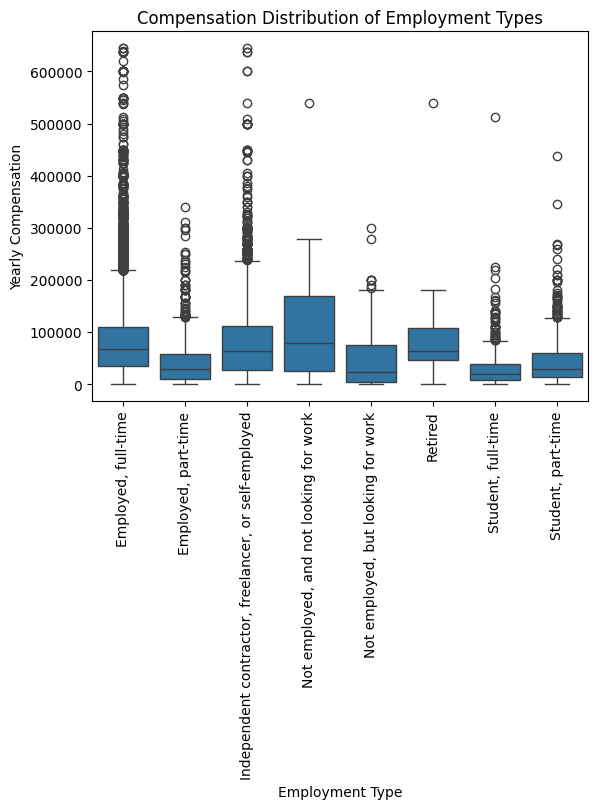

In [27]:
# your code goes here
df4 = df2[['ResponseId', 'Employment', 'ConvertedCompYearly']].dropna().copy()
# reshape Employment type from wide to long format (i.e. separate rows)
df4['Employment'] = df4['Employment'].str.split(';')
df4 = df4.explode('Employment')
df4['Employment'] = df4['Employment'].str.strip()
sns.boxplot(data=df4, x='Employment', y='ConvertedCompYearly', order=pd.Series(df4['Employment'].unique()).sort_values())
plt.title('Compensation Distribution of Employment Types')
plt.ylabel('Yearly Compensation')
plt.xlabel('Employment Type')
plt.xticks(rotation=90)

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


C:\Users\clifford\AppData\Local\Temp\ipykernel_24780\1952942160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CodingYears'] = df2['YearsCodePro'].dropna().replace({'Less than 1 year': '1', 'More than 50 years': '50'}).astype(int)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0-10'),
  Text(1, 0, '10-20'),
  Text(2, 0, '20-30'),
  Text(3, 0, '30-40'),
  Text(4, 0, '40-50'),
  Text(5, 0, '50-60'),
  Text(6, 0, '60-70'),
  Text(7, 0, '70-80'),
  Text(8, 0, '80-90'),
  Text(9, 0, '90-100')])

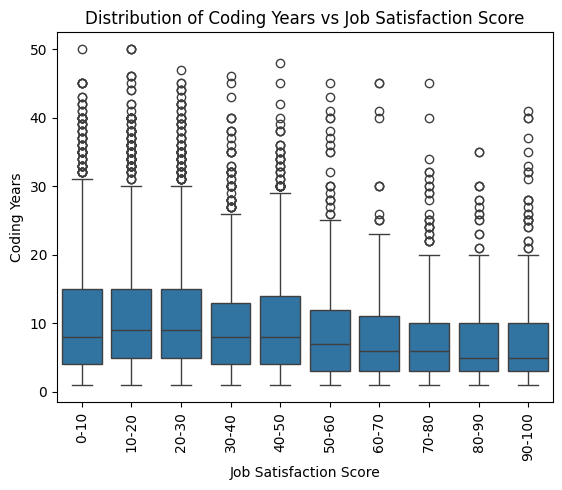

In [25]:
# your code goes here
df2['CodingYears'] = df2['YearsCodePro'].dropna().replace({'Less than 1 year': '1', 'More than 50 years': '50'}).astype(int)
sns.boxplot(data=df2, x='SatPoints', y='CodingYears')
plt.title('Distribution of Coding Years vs Job Satisfaction Score')
plt.ylabel('Coding Years')
plt.xlabel('Job Satisfaction Score')
plt.xticks(rotation=90)

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [24]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
